# Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the CSV files


In [2]:
calls_path = r'C:\Users\luv\Downloads\cleaned_calls.csv'  
reason_path = r'C:\Users\luv\Downloads\reason18315ff.csv'
sentiment_path = r'C:\Users\luv\Downloads\sentiment_statisticscc1e57a.csv'
customer_path = r'C:\Users\luv\Downloads\cleaned_customers.csv'  

In [3]:
calls = pd.read_csv(calls_path)
reasons = pd.read_csv(reason_path)
sentiment = pd.read_csv(sentiment_path)
customers = pd.read_csv(customer_path)

In [4]:
merged_data = pd.merge(calls, reasons, on='call_id', how='inner')
merged_data = pd.merge(merged_data, sentiment, on='call_id', how='inner')
merged_data = pd.merge(merged_data, customers, on='customer_id', how='inner')

## Convert datetime columns to proper datetime format

In [5]:
merged_data['call_start_datetime'] = pd.to_datetime(merged_data['call_start_datetime'])
merged_data['call_end_datetime'] = pd.to_datetime(merged_data['call_end_datetime'])

In [6]:
# Calculated Handle Time (in seconds)
merged_data['handle_time'] = (merged_data['call_end_datetime'] - merged_data['call_start_datetime']).dt.total_seconds()

In [7]:
sns.set(style="whitegrid")

# Visualization 1: Average Handle Time by Customer Tone

C:\Users\luv\AppData\Local\Temp\ipykernel_13156\1910789437.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='customer_tone', y='handle_time', data=merged_data, estimator=pd.Series.mean, ci=None, palette='Blues_d')
C:\Users\luv\AppData\Local\Temp\ipykernel_13156\1910789437.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_tone', y='handle_time', data=merged_data, estimator=pd.Series.mean, ci=None, palette='Blues_d')


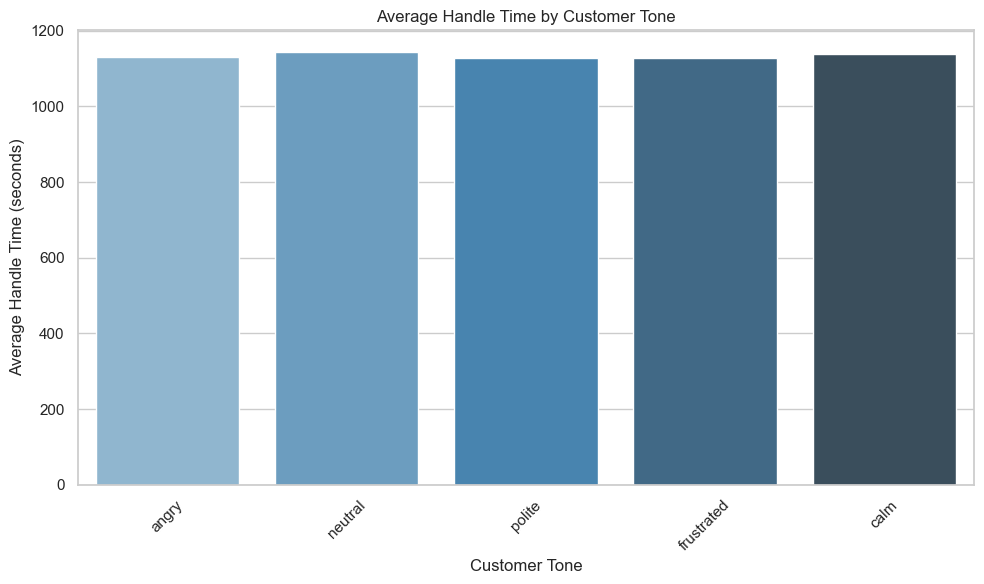

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_tone', y='handle_time', data=merged_data, estimator=pd.Series.mean, ci=None, palette='Blues_d')
plt.title('Average Handle Time by Customer Tone')
plt.ylabel('Average Handle Time (seconds)')
plt.xlabel('Customer Tone')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 2: Average Handle Time by Agent Tone

C:\Users\luv\AppData\Local\Temp\ipykernel_13156\3839967779.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='agent_tone', y='handle_time', data=merged_data, estimator=pd.Series.mean, ci=None, palette='Greens_d')
C:\Users\luv\AppData\Local\Temp\ipykernel_13156\3839967779.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='agent_tone', y='handle_time', data=merged_data, estimator=pd.Series.mean, ci=None, palette='Greens_d')


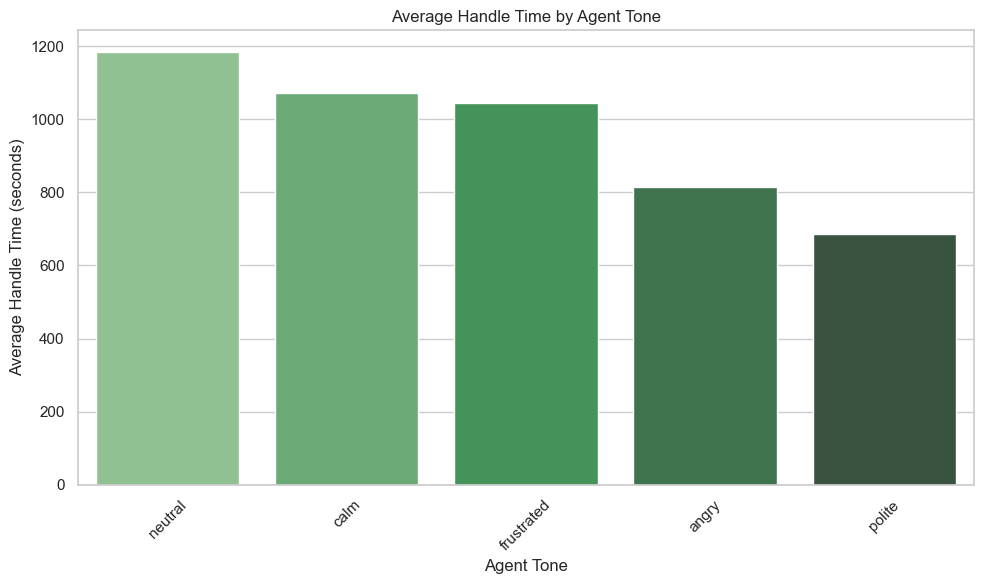

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x='agent_tone', y='handle_time', data=merged_data, estimator=pd.Series.mean, ci=None, palette='Greens_d')
plt.title('Average Handle Time by Agent Tone')
plt.ylabel('Average Handle Time (seconds)')
plt.xlabel('Agent Tone')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 3: Frequency of Primary Call Reasons

C:\Users\luv\AppData\Local\Temp\ipykernel_13156\181365311.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='primary_call_reason', data=merged_data, order=merged_data['primary_call_reason'].value_counts().nlargest(10).index, palette='coolwarm')


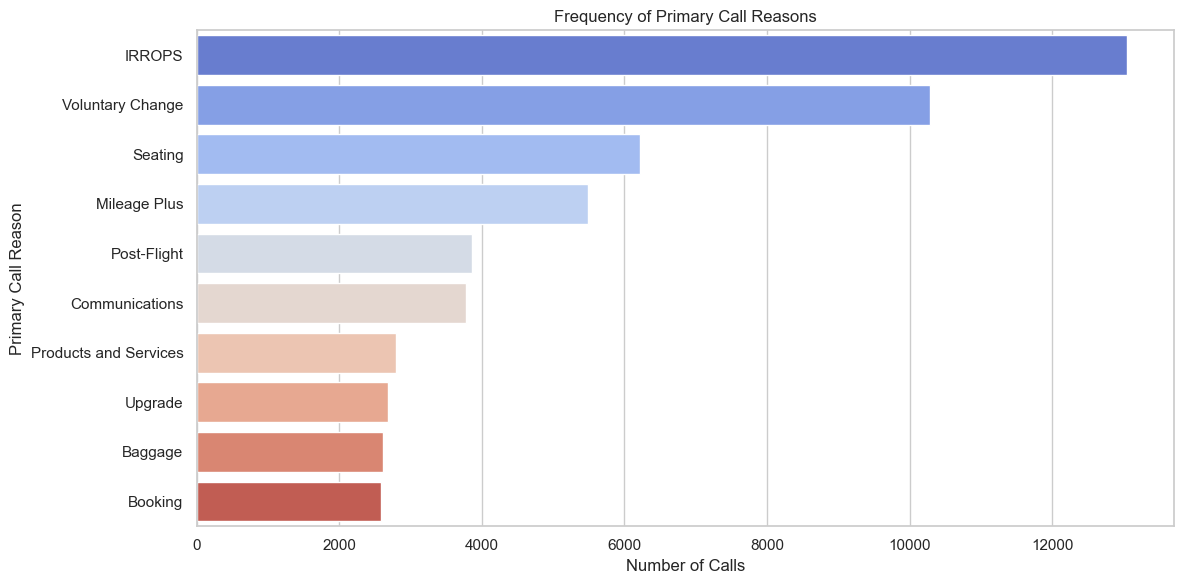

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(y='primary_call_reason', data=merged_data, order=merged_data['primary_call_reason'].value_counts().nlargest(10).index, palette='coolwarm')
plt.title('Frequency of Primary Call Reasons')
plt.xlabel('Number of Calls')
plt.ylabel('Primary Call Reason')
plt.tight_layout()
plt.show()


# Visualization 4: Average Handle Time by Primary Call Reason

C:\Users\luv\AppData\Local\Temp\ipykernel_13156\1192347570.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y='primary_call_reason', x='handle_time', data=merged_data,order=merged_data['primary_call_reason'].value_counts().nlargest(10).index, estimator=pd.Series.mean, ci=None, palette='Purples_d')
C:\Users\luv\AppData\Local\Temp\ipykernel_13156\1192347570.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='primary_call_reason', x='handle_time', data=merged_data,order=merged_data['primary_call_reason'].value_counts().nlargest(10).index, estimator=pd.Series.mean, ci=None, palette='Purples_d')


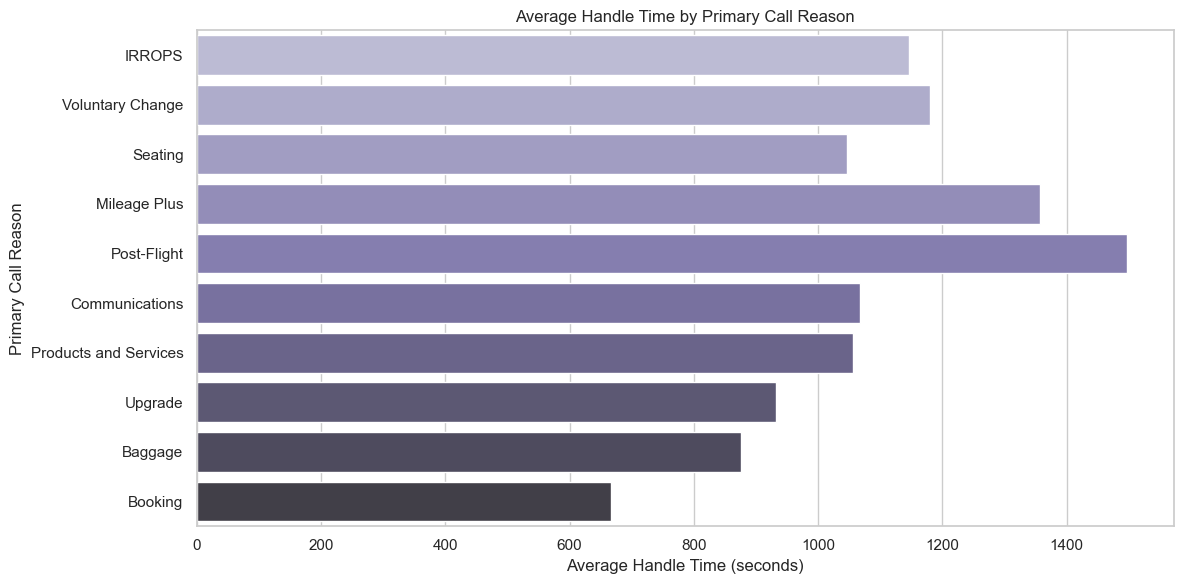

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(y='primary_call_reason', x='handle_time', data=merged_data,order=merged_data['primary_call_reason'].value_counts().nlargest(10).index, estimator=pd.Series.mean, ci=None, palette='Purples_d')
plt.title('Average Handle Time by Primary Call Reason')
plt.xlabel('Average Handle Time (seconds)')
plt.ylabel('Primary Call Reason')
plt.tight_layout()
plt.show()

# Visualization 5: Call Volume by Day

C:\Users\luv\AppData\Local\Temp\ipykernel_13156\3415347000.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='call_day', data=merged_data, palette='Reds_d')


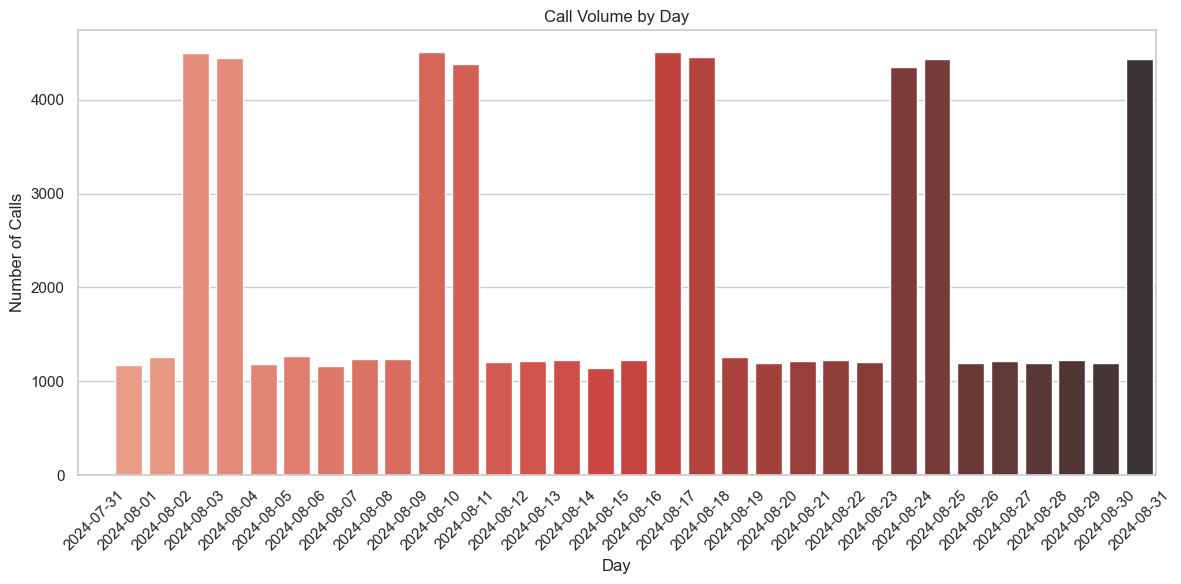

In [16]:
merged_data['call_day'] = merged_data['call_start_datetime'].dt.date
plt.figure(figsize=(12, 6))
sns.countplot(x='call_day', data=merged_data, palette='Reds_d')
plt.title('Call Volume by Day')
plt.xlabel('Day')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 6: Agent Tone vs. Customer Tone (Heatmap)

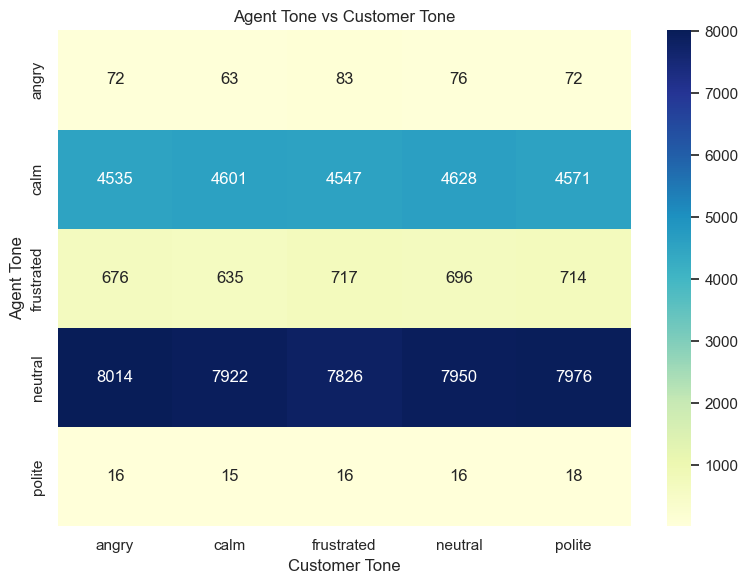

In [17]:
tone_crosstab = pd.crosstab(merged_data['agent_tone'], merged_data['customer_tone'])
plt.figure(figsize=(8, 6))
sns.heatmap(tone_crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Agent Tone vs Customer Tone')
plt.ylabel('Agent Tone')
plt.xlabel('Customer Tone')
plt.tight_layout()
plt.show()

# Visualization 7: Word Cloud

In [25]:
print("Reason DataFrame Head:")
print(reason_data.head())  

print("Columns in the DataFrame:")
print(reason_data.columns)  

if 'primary_call_reason' in reason_data.columns:
    call_reason_frequency = reason_data['primary_call_reason'].value_counts().reset_index()
    call_reason_frequency.columns = ['primary_call_reason', 'frequency']
    
    print("Call Reason Frequency DataFrame:")
    print(call_reason_frequency.head())
else:
    print("'primary_call_reason' column not found in the DataFrame.")


Reason DataFrame Head:
      call_id primary_call_reason
0  4667960400   Voluntary  Cancel
1  1122072124             Booking
2  6834291559              IRROPS
3  2266439882             Upgrade
4  1211603231             Seating
Columns in the DataFrame:
Index(['call_id', 'primary_call_reason'], dtype='object')
Call Reason Frequency DataFrame:
  primary_call_reason  frequency
0              IRROPS      13057
1    Voluntary Change      10291
2             Seating       6223
3        Mileage Plus       5487
4         Post-Flight       3869


In [26]:
pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


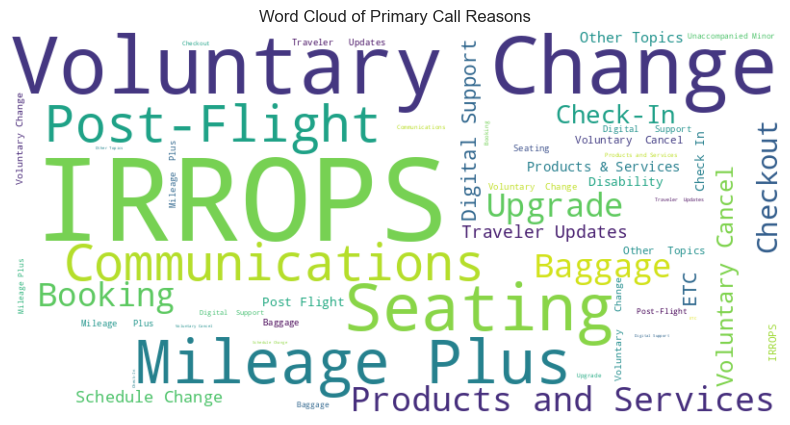

In [27]:
from wordcloud import WordCloud

word_freq_dict = dict(zip(call_reason_frequency['primary_call_reason'], call_reason_frequency['frequency']))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Primary Call Reasons')
plt.show()
